<a href="https://colab.research.google.com/github/66aadesh/AirBnB-Bookings-EDA/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## Introduction

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com. (Source- https://en.wikipedia.org/wiki/Airbnb)

- EDA Definition- Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to 
1. maximize insight into a data set;
2. uncover underlying structure;
3. extract important variables;
4. detect outliers and anomalies;
5. test underlying assumptions;
6. develop parsimonious models; and
7. determine optimal factor settings.

(Source- https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20is,of%20techniques%20(mostly%20graphical)%20to)

- Hence it is safe to say that EDA itself will not be enough for fruitful application of data to improve a business or an organization.
- However, it should be noted that EDA will be helpful for a sppecific purpose.
Example-
1. For a given sales data of a product in a company, the EDA profiling of customers can be useful in recogonizing the needs of customer and further improving the product. EDA itself will not be useful to develop features, but if some specific cutomers need a feature, then EDA can be a important tool.
2. From a sinister point of view, political parties may use EDA to identify their core vote bank and then further make laws to only suit them. This obviously is a detriment to the election system but it further proves, EDA itself is not useful but a purpose behind it must be clear.
3. For a film studio, they might conduct EDA on all the movies they have produced in the past and then produce more of the movies which have been critically and financially succesful. This can be risky as society and culture keep changing and if the quality and content of movies do not change, the studio will suffer losses. So only conducting an EDA is tricky, as data itself might not reflect real life conditions and challenges.

Without furhter ado, let us jump into conducting the EDA of the given AirBnB data set.

# BASIC CODE FOR STARTING OUR EXPLORATORY DATA ANALYSIS.

In [ ]:
# Let us start with the basic codes to import the libraries we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
!pip install gmplot
from gmplot import GoogleMapPlotter
from random import random
import codecs
import webbrowser
import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Now as the next step to import the data, we will mount the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Now we read the data that has been provided for purpose of EDA - AirBnB hotel bookings data.
airbnb_df = pd.read_csv('/content/drive/MyDrive/EDA/Airbnb NYC 2019 (2).csv')

As part of EDA let us run some basic codes to learn the data at face value.

# CHECKING THE GIVEN DATA AT FACE VALUE: -

We will run basic commands to check the quality and quantity of data that we have at hand.

In [ ]:
airbnb_df.shape

(48895, 16)

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
airbnb_df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Let us get the list of column labels so that it is easy for us to see which column data might be really important for a particular given problem.
list_of_column_labels=list(airbnb_df.columns)
print(list_of_column_labels)

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
# We will use describe() to get the measures of central tendencies, so that if trivial info is required from any column, one can easily get it.
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Q-1 What can we learn about different hosts and areas?

From a business perspective, there are probably thousands of things one might need from the asked question. However, we can find face value data and derive conclusion which might be helpful for a business looking to expand.

- One could be looking for number of listings in a district or a sub-district.
- One could be looking for the number of listings owned by the hosts based on different demographic points such as first name, caste, religion, sex, age, etc.


These above mentioned were two types of comparisons that come to the mind without a second thought about the data.
Hence we shall first look at the data and then derive the comparisons we want.

In [ ]:
# From the basic codes, we know that not all columns are required for Q-1 so we will pick the ones which are necessary and prepare graphical representations.

hosts_and_areas=airbnb_df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood']]
hosts_and_areas.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown


# GRAPH - 1.1

In [ ]:
# Although we do get meaningful data from the above subset of main dataframe, we shall divide it according to the neighbourhood and neighbourhood_group.
hosts_and_areas_neighbourhood_group=airbnb_df[['id','name','host_id','host_name','neighbourhood_group']].rename(columns={'id':'Number of listings'})
hosts_and_areas_neighbourhood_group.head(10)

,Number of listings,name,host_id,host_name,neighbourhood_group
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan


In [ ]:
# Let us find the density of listings on base of neighbourhood_group.
hosts_and_areas_neighbourhood_group_bar=hosts_and_areas_neighbourhood_group.groupby('neighbourhood_group')['Number of listings'].count()
hosts_and_areas_neighbourhood_group_bar

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: Number of listings, dtype: int64

Text(0, 0.5, 'Number of listings')

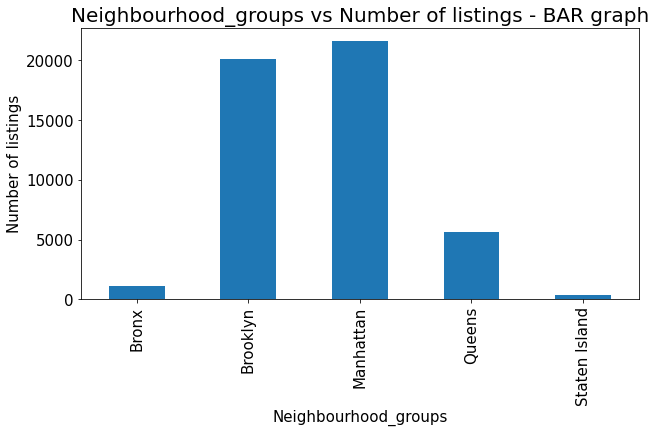

In [ ]:
# Let us finally write the codes to print the graphical representation of the above data.
bar_1=hosts_and_areas_neighbourhood_group_bar.plot.bar(figsize=(10,5),fontsize=15)
bar_1.set_title("Neighbourhood_groups vs Number of listings - BAR graph", fontsize=20)
bar_1.set_xlabel("Neighbourhood_groups", fontsize=15)
bar_1.set_ylabel("Number of listings", fontsize=15)

Text(0.5, 1.0, 'Neighbourhood_groups vs Number of listings - PIE chart')

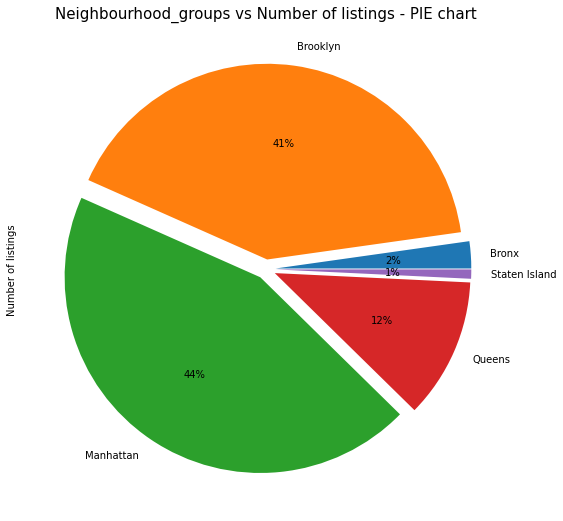

In [ ]:
# We can also print a pie chart to represent the aobve data.
pie_1=hosts_and_areas_neighbourhood_group_bar.plot.pie(figsize=(18,9), fontsize=10, explode=(0.05,0.05,0.05,0.05,0.05),autopct='%1.0f%%')
pie_1.set_title("Neighbourhood_groups vs Number of listings - PIE chart", fontsize=15)

# GRAPH - 1.2

In [ ]:
# Now let us check the number of listings with respect to Nieghbourhood.
hosts_and_areas_neighbourhood=airbnb_df[['id','name','host_id','host_name','neighbourhood']].rename(columns={'id':'Number of listings'})
hosts_and_areas_neighbourhood.head(10)

,Number of listings,name,host_id,host_name,neighbourhood
0,2539,Clean & quiet apt home by the park,2787,John,Kensington
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill
6,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Hell's Kitchen
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Upper West Side
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Chinatown


In [ ]:
# Running groupby on the dataframe.
hosts_and_areas_neighbourhood_bar=hosts_and_areas_neighbourhood.groupby('neighbourhood')['Number of listings'].count()
hosts_and_areas_neighbourhood_bar

neighbourhood
Allerton            42
Arden Heights        4
Arrochar            21
Arverne             77
Astoria            900
                  ... 
Windsor Terrace    157
Woodhaven           88
Woodlawn            11
Woodrow              1
Woodside           235
Name: Number of listings, Length: 221, dtype: int64

Text(0, 0.5, 'Number of listings')

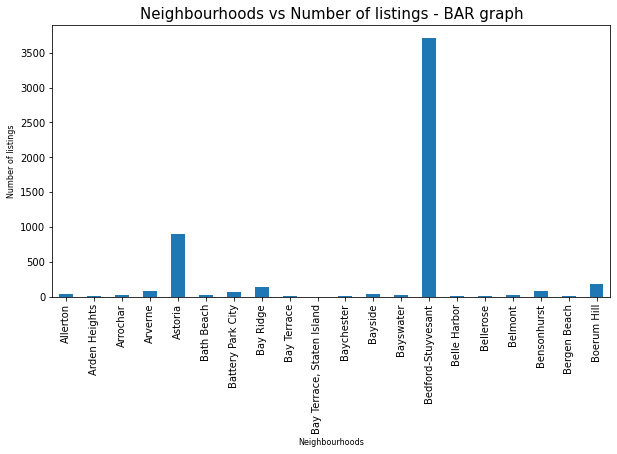

In [ ]:
# As it is clear from above, that the dataframe has 221 rows, hence instead of printing all of the data, we will only print the first 20, to get an idea.
bar_2=hosts_and_areas_neighbourhood_bar.head(20).plot.bar(figsize=(10,5),fontsize=10)
bar_2.set_title("Neighbourhoods vs Number of listings - BAR graph", fontsize=15)
bar_2.set_xlabel("Neighbourhoods", fontsize=8)
bar_2.set_ylabel("Number of listings", fontsize=8)

Text(0.5, 1.0, 'Neighbourhood vs Number of listings - PIE chart')

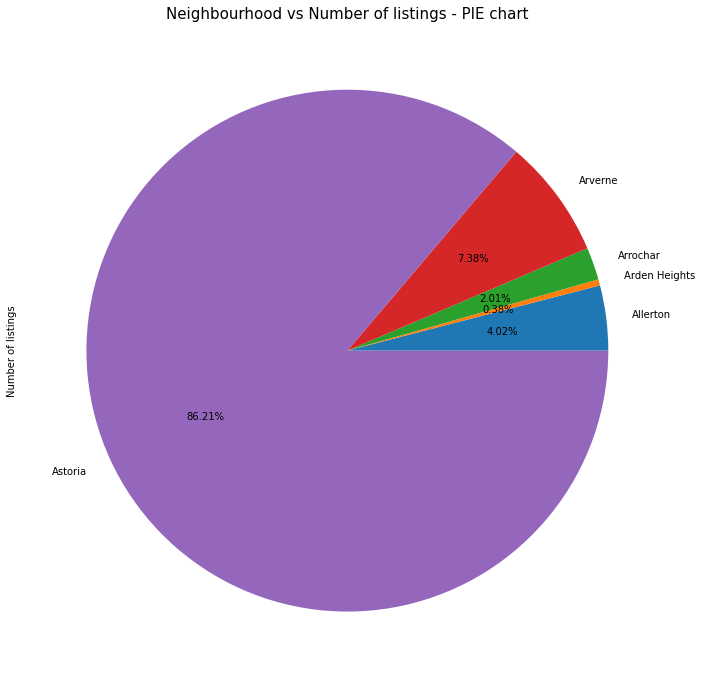

In [ ]:
# We can also print a pie chart to represent the aobve data.
pie_2=hosts_and_areas_neighbourhood_bar.head(5).plot.pie(figsize=(20,12), fontsize=10,autopct='%1.2f%%')
pie_2.set_title("Neighbourhood vs Number of listings - PIE chart", fontsize=15)

# Q-2 What can we learn from predictions? (ex: locations, prices, reviews, etc)

Locations, prices, reviews, etc. are the data which may be helpful in optimization of the services provided by a business.

For example- 
1. Low reviews might indicate low level of quality being maintained at a given listing. Once EDA is performed to identify the low reviews locations, mitigative action can be employed to improve the quality.
2. Prices can be justified with respect to the reviews. High prices can be justified by corresponding high review and vice versa can also be true. So at a regular period, this relation can be reviewed. Now the prices should obviously not be cut, but quality of those listings can be improved. 
3. Suppose a location has an average low prices compared to the whole dataframe, yet there are some outliers with high prices. We can identify the reasons for the same or we could regulate the listings.


In [ ]:
# There are 16 columns and not every one of them will be important for Q-2. So we will only pick the columns which are important.
location_prices_reviews=airbnb_df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month']]
location_prices_reviews.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,2017-10-05,0.40
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,2019-06-24,3.47
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,2017-07-21,0.99
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,Entire home/apt,150,1,160,2019-06-09,1.33


# GRAPH - 2.1

With the central tendedcies printed, one can easily get trivial data at face value.

In [ ]:
# Let us get the measures of central tendencies for prices.
location_prices_reviews['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Now let us print a graph to represent the top 5 and Bottom 5 listings with highest prices.

In [ ]:
top_five_prices_neighbourhood= location_prices_reviews.groupby('neighbourhood')['price'].mean()
top_five_prices_neighbourhood1=top_five_prices_neighbourhood.sort_values(ascending=False)
top_five_prices_neighbourhood1

neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64

Text(0, 0.5, 'Average Price')

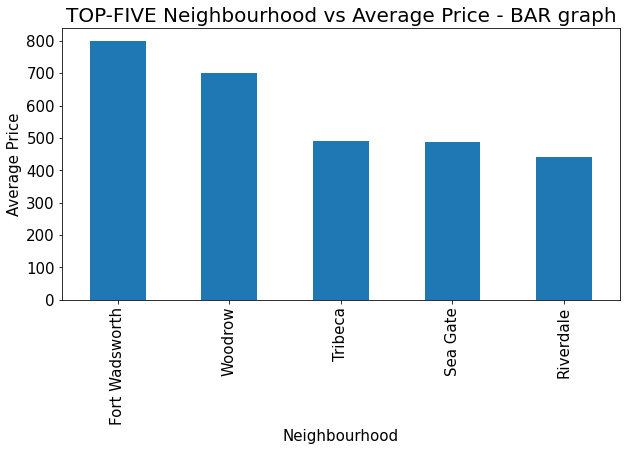

In [ ]:
bar_3=top_five_prices_neighbourhood1.head(5).plot.bar(figsize=(10,5),fontsize=15)
bar_3.set_title("TOP-FIVE Neighbourhood vs Average Price - BAR graph", fontsize=20)
bar_3.set_xlabel("Neighbourhood", fontsize=15)
bar_3.set_ylabel("Average Price", fontsize=15)

Text(0, 0.5, 'Average Price')

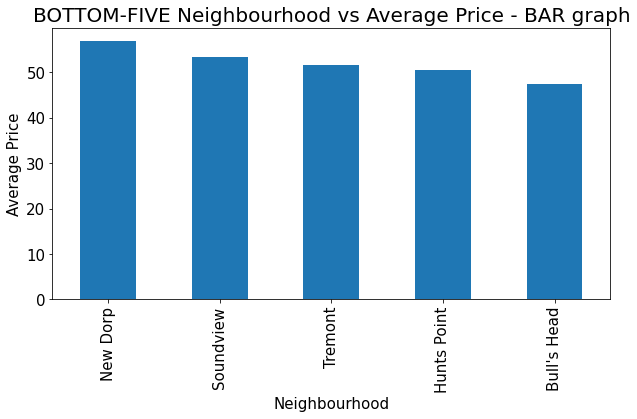

In [ ]:
bar_3=top_five_prices_neighbourhood1.tail(5).plot.bar(figsize=(10,5),fontsize=15)
bar_3.set_title("BOTTOM-FIVE Neighbourhood vs Average Price - BAR graph", fontsize=20)
bar_3.set_xlabel("Neighbourhood", fontsize=15)
bar_3.set_ylabel("Average Price", fontsize=15)

# GRAPH - 2.2

In [ ]:
# Let us get the measures of central tendencies for reviews.
location_prices_reviews[['number_of_reviews','reviews_per_month']].describe()

,number_of_reviews,reviews_per_month
count,48895.000000,38843.000000
mean,23.274466,1.373221
std,44.550582,1.680442
min,0.000000,0.010000
25%,1.000000,0.190000
50%,5.000000,0.720000
75%,24.000000,2.020000
max,629.000000,58.500000


Let us find the listings with maximum numbers of reviews. 

The logical idea behind this is to find the listing with most reliable reviews. The more the number of reviews, more the reliability of review itself.
So if a listing has high rating but low number of reviews, the data is not reliable, whereas in a vice versa case, the data will be reliable.

In [ ]:
sorted_number_of_reviews=location_prices_reviews.sort_values(by=['number_of_reviews'],ascending=False)
sorted_number_of_reviews.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,Private room,47,1,629,2019-07-05,14.58
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,Private room,49,1,607,2019-06-21,7.75
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,Private room,49,1,597,2019-06-23,7.72
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,Private room,49,1,594,2019-06-15,7.57
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,Private room,47,1,576,2019-06-27,13.40


Text(0.5, 1.0, 'Top five listings with highest number of reviews')

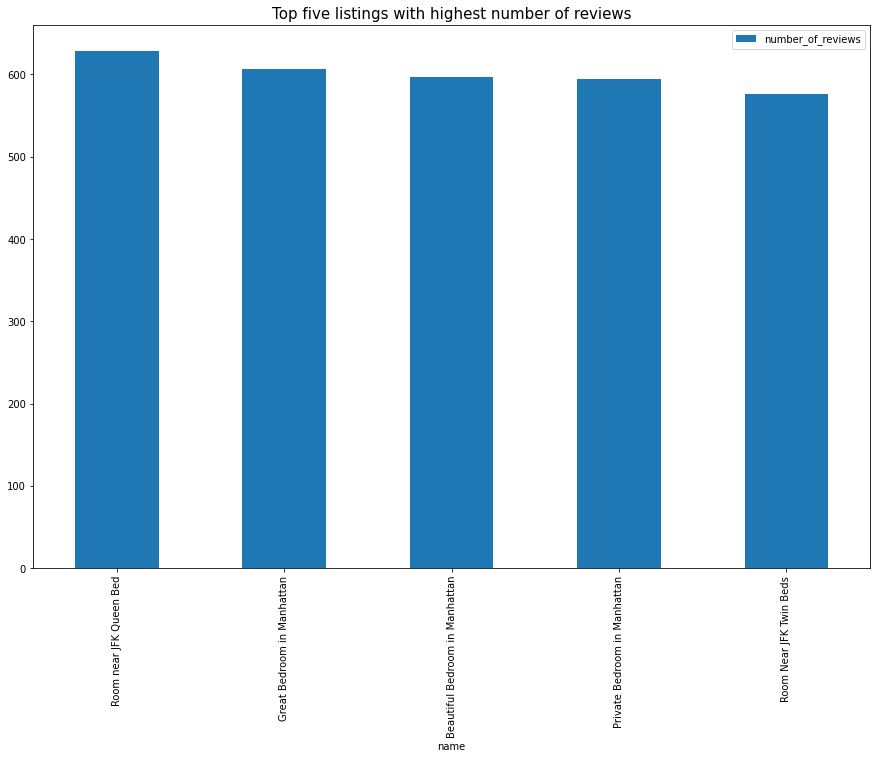

In [ ]:
bar_4=sorted_number_of_reviews.head().plot.bar(figsize=(15,10), x='name', y='number_of_reviews')
bar_4.set_title('Top five listings with highest number of reviews', fontsize=15)

# GRAPH - 2.3

We also have different room types and maybe we can try to relate it with the room type and the average prices.

Text(0, 0.5, 'Average Price')

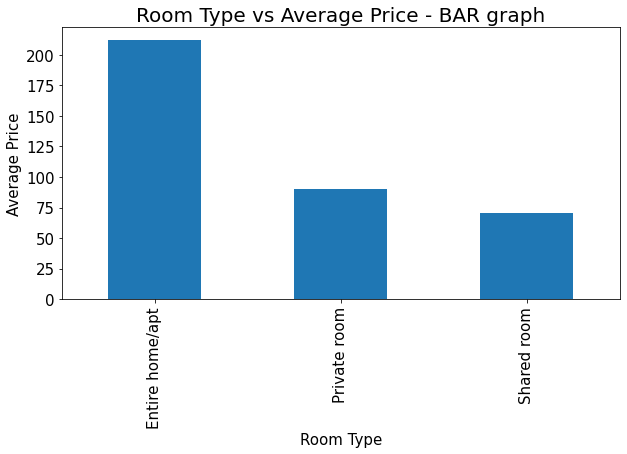

In [ ]:
prices_roomtype= location_prices_reviews.groupby('room_type')['price'].mean()
prices_roomtype1=prices_roomtype.sort_values(ascending=False)
bar_5=prices_roomtype.plot.bar(figsize=(10,5),fontsize=15)
bar_5.set_title("Room Type vs Average Price - BAR graph", fontsize=20)
bar_5.set_xlabel("Room Type", fontsize=15)
bar_5.set_ylabel("Average Price", fontsize=15)

# Which hosts are the busiest and why?

When we talk about busyness of an AirBnb listing we need to make sure what do we mean by it. Are we looking for number guests a hosts has to cater to in a given time period, or is it the number of bookings that happen or etc.

For our purpose, we can look at the datafram itself and we can see, numbers of reviews per month is a parameter which might indicate how many times a guest has visited a listing in a month. So a high number of reviews per month would definitely mean high number of guests and hence the listing being the busiest.

For this hypothesis we can check whether the host has multiple property listings or not.

From that we can find the avg number of reviews per month for each host across all the multiple properties.

This will give us a picture of busyness of hosts as mentioned in the problem statement.

Example-
- Let Goku is a host who owns 5 property listings [A,B,C,D,E] across multiple neighbourhoods and Vegeta is a host who owns 3 property listings [F,G,H] across multiple neighbourhoods. 

- The number of reviews per month for Goku's 5 properties are [20,25,3,10,1] and the same for Vegeta's 3 properties are [18,35,33].

- The avg number of reviews per month for Goku and Vegeta are 11.80 and 28.66 respectively.

- We can clearly see that even though Goku has more number of property listings than Vegeta, his average reviews per month is lower than that of Vegeta. So by average of this parameter, it is safe to say that to find the busyness of a host, number of reviews per month is a good indicator.

- But there are some drawbacks too, this type of comparison migth be askewed in favour of those hosts who have more listings. They might overwhelm the average with sheer numbers. So if required, we can create complex filters and comparisons. For this EDA we shall not dwelve into all of those relations as right now, we do not have a purpose to satisfy. As mentioned earlier, EDA is effective when a purpose is clear.

- And that is the beauty of EDA, we can apply multiple filters and draw conclusions based on our proposed hypothesis.

In [ ]:
# As a first step we will try to check the unique hosts and their counts.
# How do we know that there are hosts who own multiple listings?
# If we look at the head() of our datafram airbnb_df, we can observe the column 'calculated_hosts_listings_count', so we know there are hosts who own multiple listings.
trial_df=airbnb_df.groupby(['host_name'])['id'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
trial_df

,host_name,Count
7135,Michael,417
2376,David,403
9781,Sonder (NYC),327
4989,John,294
314,Alex,279
...,...,...
4804,Jerbean,1
4803,Jerald,1
4802,Jeonghoon,1
4800,Jeny,1


In [ ]:
trial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11452 entries, 7135 to 11451
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   host_name  11452 non-null  object
 1   Count      11452 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 268.4+ KB


# GRAPH - 3.1

In [ ]:
# Let us find "TOP-FIVE Hosts vs Average reviews per month".
# Out of the thousands of listings, first 5 would be good enough to know which hosts are the busiest.
busy_hosts_df=airbnb_df.groupby(['host_name'])['reviews_per_month'].mean()
busy_hosts_df1=busy_hosts_df.sort_values(ascending=False)
busy_hosts_df1

host_name
Row NYC    18.620000
Nalicia    18.126667
Dona       13.990000
Aisling    13.420000
Malini     13.150000
             ...    
韦达               NaN
馨惠               NaN
단비               NaN
진                NaN
현선               NaN
Name: reviews_per_month, Length: 11452, dtype: float64

Text(0, 0.5, 'Average Reviews per month')

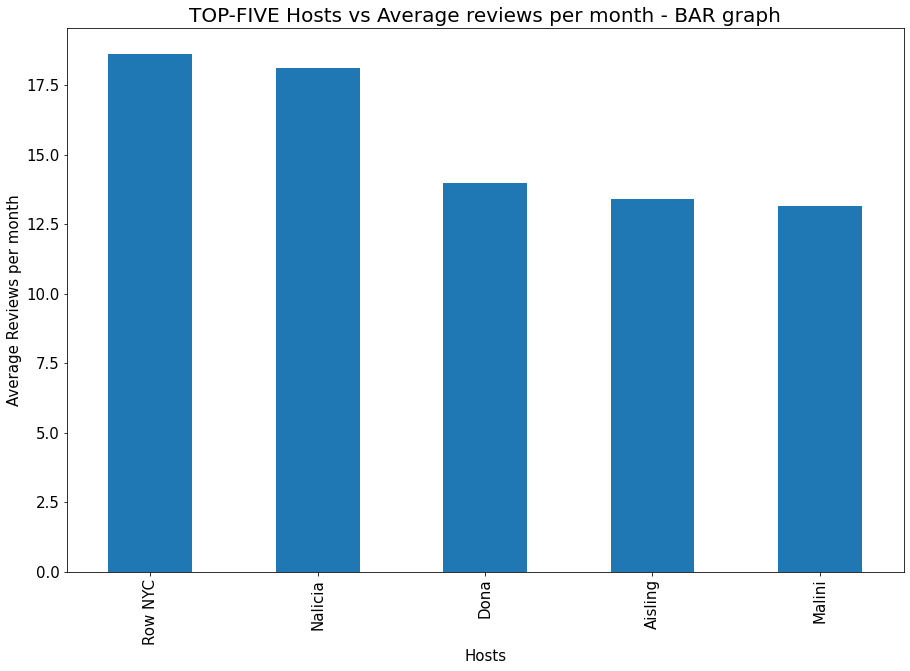

In [ ]:
bar_4=busy_hosts_df1.head().plot.bar(figsize=(15,10),fontsize=15)
bar_4.set_title("TOP-FIVE Hosts vs Average reviews per month - BAR graph", fontsize=20)
bar_4.set_xlabel("Hosts", fontsize=15)
bar_4.set_ylabel("Average Reviews per month", fontsize=15)

# GRAPH - 3.2

In [ ]:
# We can match our findings by comparing the the "top neighbourhoods by average number of reviews per month" and "neighbourhoods of top listings with average number of reviews per month".
# If what we have found in above GRAPH-3.1, our comparison should be similar.  
busy_hosts_neighbourhood_df=airbnb_df.groupby(['neighbourhood_group'])['reviews_per_month'].mean()
busy_hosts_neighbourhood_df1=busy_hosts_neighbourhood_df.sort_values(ascending=False)
busy_hosts_neighbourhood_df1

neighbourhood_group
Queens           1.941200
Staten Island    1.872580
Bronx            1.837831
Brooklyn         1.283212
Manhattan        1.272131
Name: reviews_per_month, dtype: float64

Text(0, 0.5, 'Average Reviews per month')

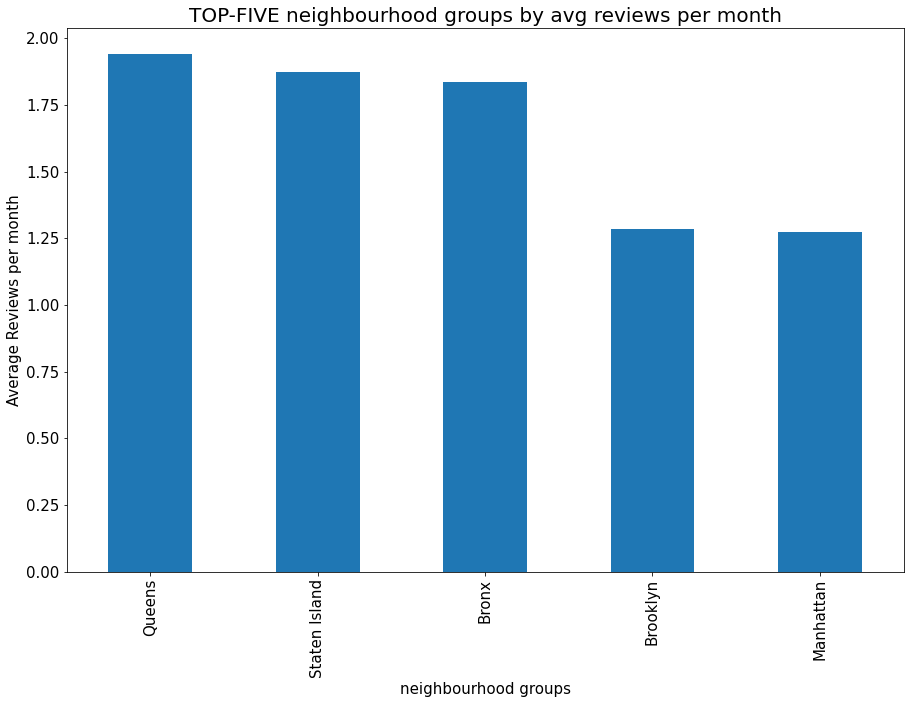

In [ ]:
bar_5=busy_hosts_neighbourhood_df1.plot.bar(figsize=(15,10),fontsize=15)
bar_5.set_title("TOP-FIVE neighbourhood groups by avg reviews per month", fontsize=20)
bar_5.set_xlabel("neighbourhood groups", fontsize=15)
bar_5.set_ylabel("Average Reviews per month", fontsize=15)

# GRAPH - 3.3

In [ ]:
# Let us plot the graph for top 10 busiest host's neighbourhoods.
busy_hosts_list=list(dict(busy_hosts_df1).keys())[0:11]
busy_hosts_list

['Row NYC',
 'Nalicia',
 'Dona',
 'Aisling',
 'Malini',
 'Anabell',
 'Miss Dy',
 'Meeks',
 'Britt & Greg',
 'Hamad',
 'T+Y+K+M']

In [ ]:
busy_hosts_neighbourhood=airbnb_df[airbnb_df['host_name'].isin(busy_hosts_list)]
busy_hosts_neighbourhood

In [ ]:
busy_hosts_neighbourhood1=busy_hosts_neighbourhood.groupby('neighbourhood_group')['id'].count()
busy_hosts_neighbourhood1

neighbourhood_group
Brooklyn      3
Manhattan     9
Queens       10
Name: id, dtype: int64

Text(0.5, 1.0, 'Neighbourhood_groups vs Listings with high number of reviews - PIE chart')

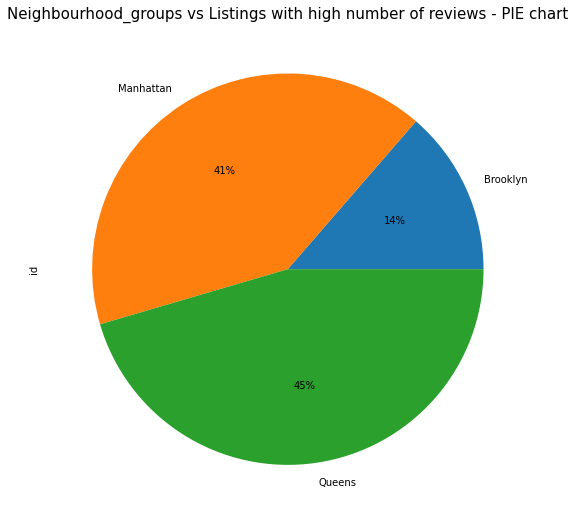

In [ ]:
pie_3=busy_hosts_neighbourhood1.plot.pie(figsize=(18,9), fontsize=10,autopct='%1.0f%%')
pie_3.set_title("Neighbourhood_groups vs Listings with high number of reviews - PIE chart", fontsize=15)

# Q-4 Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
map_plot = px.scatter_geo(airbnb_df,lat='latitude',lon='longitude',hover_name="host_name")
map_plot.update_layout(title = 'Map of all listings', title_x=0.5)
map_plot.show()

In [ ]:
#DO NOT EDIT

class CustomGoogleMapPlotter(GoogleMapPlotter):
    def __init__(self, center_lat, center_lng, zoom, apikey='',
                 map_type='satellite'):
        if apikey == '':
            try:
                with open('apikey.txt', 'r') as apifile:
                    apikey = apifile.readline()
            except FileNotFoundError:
                pass
        super().__init__(center_lat, center_lng, zoom, apikey)

        self.map_type = map_type
        assert(self.map_type in ['roadmap', 'satellite', 'hybrid', 'terrain'])

    def write_map(self,  f):
        f.write('\t\tvar centerlatlng = new google.maps.LatLng(%f, %f);\n' %
                (self.center[0], self.center[1]))
        f.write('\t\tvar myOptions = {\n')
        f.write('\t\t\tzoom: %d,\n' % (self.zoom))
        f.write('\t\t\tcenter: centerlatlng,\n')

        # Change this line to allow different map types
        f.write('\t\t\tmapTypeId: \'{}\'\n'.format(self.map_type))

        f.write('\t\t};\n')
        f.write(
            '\t\tvar map = new google.maps.Map(document.getElementById("map_canvas"), myOptions);\n')
        f.write('\n')

    def color_scatter(self, lats, lngs, values=None, colormap='coolwarm',
                      size=None, marker=False, s=None, **kwargs):
        def rgb2hex(rgb):
            """ Convert RGBA or RGB to #RRGGBB """
            rgb = list(rgb[0:3]) # remove alpha if present
            rgb = [int(c * 255) for c in rgb]
            hexcolor = '#%02x%02x%02x' % tuple(rgb)
            return hexcolor

        if values is None:
            colors = [None for _ in lats]
        else:
            cmap = plt.get_cmap(colormap)
            norm = Normalize(vmin=min(values), vmax=max(values))
            scalar_map = ScalarMappable(norm=norm, cmap=cmap)
            colors = [rgb2hex(scalar_map.to_rgba(value)) for value in values]
        for lat, lon, c in zip(lats, lngs, colors):
            self.scatter(lats=[lat], lngs=[lon], c=c, size=size, marker=marker,
                         s=s, **kwargs)


initial_zoom = 12
num_pts = 40

lats = list(airbnb_df['latitude'])
lons = list(airbnb_df['longitude'])
values = [random() * 20]
for pt in range(num_pts):
    lats.append(lats[-1] + (random() - 0.5)/100)
    lons.append(lons[-1] + random()/100)
    values.append(values[-1] + random())
gmap = CustomGoogleMapPlotter(lats[0], lons[0], initial_zoom,
                              map_type='satellite')
gmap.color_scatter(lats, lons, values, colormap='coolwarm')

gmap.draw("mymap.html")

In [ ]:
list_for_map=airbnb_df[['host_id','latitude','longitude']].head(1000).values.tolist()
list_for_map

[[2787.0, 40.64749, -73.97237],
 [2845.0, 40.75362, -73.98377],
 [4632.0, 40.80902, -73.9419],
 [4869.0, 40.68514, -73.95976],
 [7192.0, 40.79851, -73.94399],
 [7322.0, 40.74767, -73.975],
 [7356.0, 40.68688, -73.95596],
 [8967.0, 40.76489, -73.98493],
 [7490.0, 40.80178, -73.96723],
 [7549.0, 40.71344, -73.99037],
 [7702.0, 40.80316, -73.96545],
 [7989.0, 40.76076, -73.98867],
 [9744.0, 40.66829, -73.98779],
 [11528.0, 40.79826, -73.96113],
 [11975.0, 40.7353, -74.00525],
 [15991.0, 40.70837, -73.95352],
 [17571.0, 40.69169, -73.97185],
 [18946.0, 40.74192, -73.99501],
 [20950.0, 40.67592, -73.94694],
 [17985.0, 40.79685, -73.94872],
 [21207.0, 40.71842, -73.95718],
 [22486.0, 40.68069, -73.97706],
 [22486.0, 40.67989, -73.97798],
 [22486.0, 40.68001, -73.97865],
 [25183.0, 40.68371, -73.94028],
 [25326.0, 40.65599, -73.97519],
 [26394.0, 40.86754, -73.92639],
 [30193.0, 40.76715, -73.98533],
 [31374.0, 40.86482, -73.92106],
 [21904.0, 40.7292, -73.98542],
 [32294.0, 40.82245, -73.951

In [ ]:
traffic_map=folium.Map(location=[40.64749,-73.97237])
fg=folium.FeatureGroup(name='listings_map1')

for i in list_for_map:
  fg.add_child(folium.Marker(location=[i[1],i[2]],icon=folium.Icon(color='red')))

traffic_map.add_child(fg)

In [ ]:
traffic_map.save('airbnb_map.html')